# Supervised Learning

# Linear regression

**Linear regression Theory**

We will encounter two problems when dealing with data: regression and classification. In classification problems, we divide our data into several categories (classes). The goal is to predict the classes. The number of classes or categories can be two or more. 

But some problems require a different approach - for example, let's consider estimating big companies' gross revenue at the end of a year. In this case, we do not try to classify; rather, we try to quantify using regression theory. This means that, in theory, we are interested in an endless number of values. In the below picture, you can see a classical linear regression plot graphic. Blue points represent the real data, and the red line is the linear regression line. 

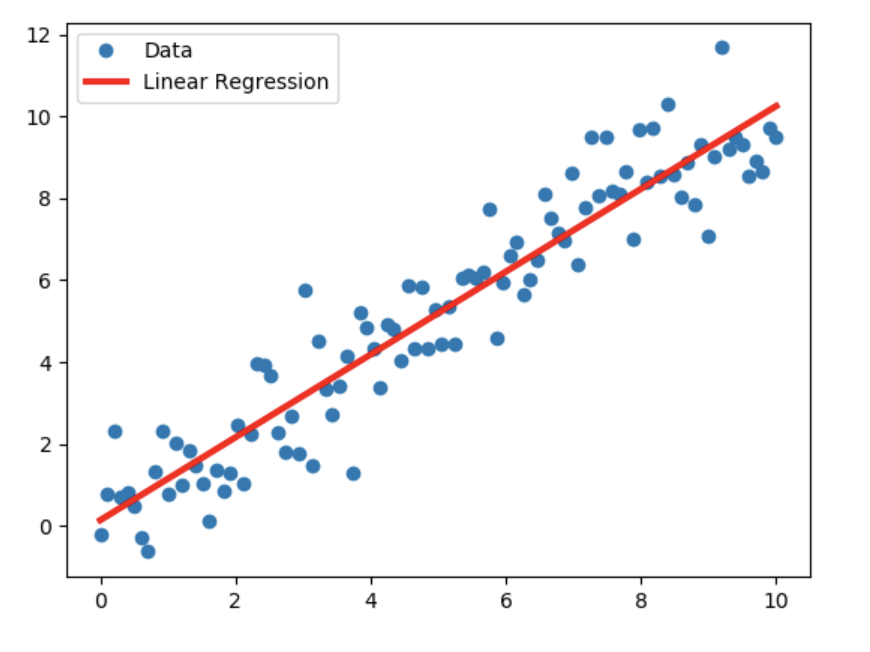

Linear regression models the relationship between one or more observed features and the target variable. Based on the data we have, we try to derive a function that will lead us to the desired result. This function creates a line (red line above) where we can search for property values and find predicted target values.  

What we need is to find a way to model a model - that is, a mathematical explanation - of the basic relationship between features and target. Conceptually, we want to draw a line that we can draw from the scatter chart of our known data, which reasonably well represents the relationship between features and target, and at the same time, we can well predict values that are not directly observed in our data.

Some main terms:

- Simple Linear Regression : a linear regression model with a single explanatory variable.
- OLS(Ordinary Least Squares) : a type of linear least squares method for estimating the unknown parameters in a linear regression model.
- Residuals : The difference between the observed value and the estimated value of the quantity of interest (for example, a sample mean).
- Cost Function : In statistics, typically a loss function is used for parameter estimation,and the event in question is some function of the difference between estimated and true values for an instance of data.
- Gradient Descent : a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent.

For linear regression, OLS (Ordinary Least Squares) is typically used to find the best-fit line by directly solving for the parameters that minimize the sum of the squared residuals. This is known as a closed-form solution. However, when the model has multiple features or regularization is needed, this closed-form solution becomes computationally expensive. In these cases, Gradient Descent is used to minimize the cost function by iteratively adjusting the parameters of the model in the direction that reduces the cost.

(In data mining tools (for multivariate statistics and machine learning), the dependent variable is assigned a role as target variable (or in some tools as label attribute), while an independent variable may be assigned a role as regular variable. Known values for the target variable are provided for the training data set and test data set, but should be predicted for other data. The target variable is used in supervised learning algorithms but not in unsupervised learning. Source wiki)

Some examples of linear regression problems are:

- Stock Price Prediction
- House/Car Price Prediction etc. 


**Scikit-Learn and Regression Error Metrics**

Scikit-Learn is a library containing many machine learning algorithms. The most important factor of this library is utilizing what they call a generalized estimate API framework to call and use the various models that you're going to be creating.

**Regression Error Metrics**

In regression problems, we have to use metrics designed for continuous values. Regression error metrics inform us about how much the actual values deviate from the regression line, which we estimate.

Some of the most common evaluation metrics for regression are:

- **Mean Absolute Error**: The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. It is thus an arithmetic average of the absolute errors {\displaystyle |e_{i}|=|y_{i}-x_{i}|}, where y_{i} is the prediction and x_{i} the true value. (yukardaki grafikte tum data pointlerin (actual) regression line'a (estimate) olan vertical farkları (residual) abs alinip toplandıktan sonra, data sayısına bolunmesiyle elde edilen deger. Eger 0 ise demek ki prediction is perfect.
- **Mean Squared Error**:  The mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. (burda ise actual and estimate points arasındaki farkın abs'si yerine kareleri alınıp toplnaıyor ve data sayısına bolunuyor. Residuallaerin karesi alindigi icin MSE MAE'den buyuk olur. Outliers halinde ozellikle daha buyur fark. )
- **Root Mean Square Error**: The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.(RMSE ise MSE'ye arti olarak mse hesaplamasının root alinmis halidir. Residualların how much dispersed olduguna dair bir estimation verir.)

In [16]:
import pandas as pd

TASK

- Import the data,
- Start to explore the data,
- Separate the data into X and y (where X is the features and y is what we're trying to predict),
- Create a linear regression object and fit the model, and then evaluate the model by using evaluation metrics.
- Using a residual plot to interpret the dataset is a valid choice for linear regression.
- Find out what the coefficients really mean in terms of the linear regression model?

In [15]:
url = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt"
df = pd.read_csv(url, delimiter="\t")

# Print the first 5 rows of the DataFrame
df.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         325 non-null    object 
 1   Author        324 non-null    object 
 2   List Price    324 non-null    float64
 3   Amazon Price  325 non-null    float64
 4   Hard/ Paper   325 non-null    object 
 5   NumPages      323 non-null    float64
 6   Publisher     324 non-null    object 
 7   Pub year      324 non-null    float64
 8   ISBN-10       325 non-null    object 
 9   Height        321 non-null    float64
 10  Width         320 non-null    float64
 11  Thick         324 non-null    float64
 12  Weight (oz)   316 non-null    float64
dtypes: float64(8), object(5)
memory usage: 33.1+ KB


In [21]:
# !pip install plotnine

In [22]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.preprocessing import StandardScaler # z-score vairables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # model evalauation

%matplotlib inline

In [23]:
# check null
df.isnull().sum()

Title           0
Author          1
List Price      1
Amazon Price    0
Hard/ Paper     0
NumPages        2
Publisher       1
Pub year        1
ISBN-10         0
Height          4
Width           5
Thick           1
Weight (oz)     9
dtype: int64

In [24]:
# drop nulls
df = df.dropna()

In [26]:
df.shape

(310, 13)

**Explore**

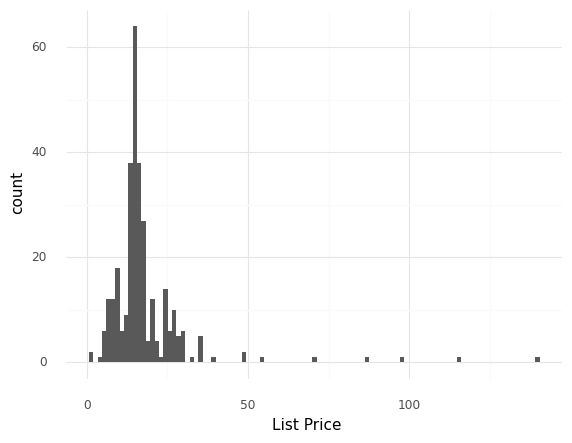

<ggplot: (8759728538877)>

In [28]:
(ggplot(df, aes(x = "List Price")) + geom_histogram() + theme_minimal())

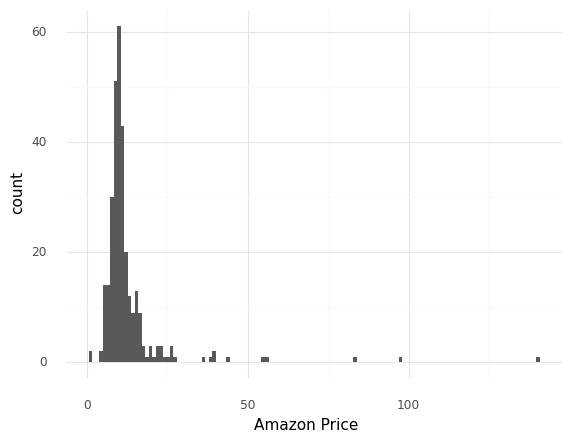

<ggplot: (8759728621972)>

In [30]:
(ggplot(df, aes(x = "Amazon Price")) + geom_histogram() + theme_minimal())

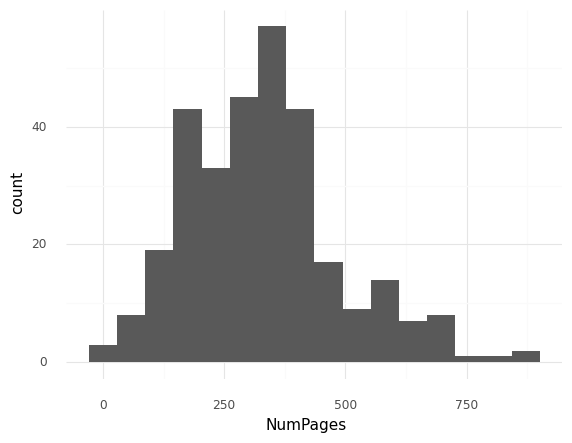

<ggplot: (8759728878767)>

In [32]:
(ggplot(df, aes(x = "NumPages")) + geom_histogram() + theme_minimal())

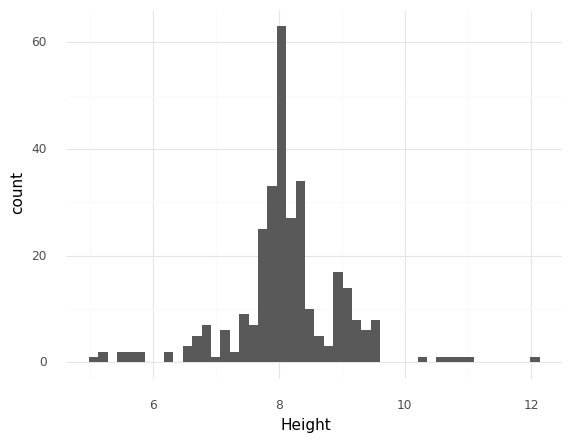

<ggplot: (8759728867973)>

In [33]:
(ggplot(df, aes(x = "Height")) + geom_histogram() + theme_minimal())

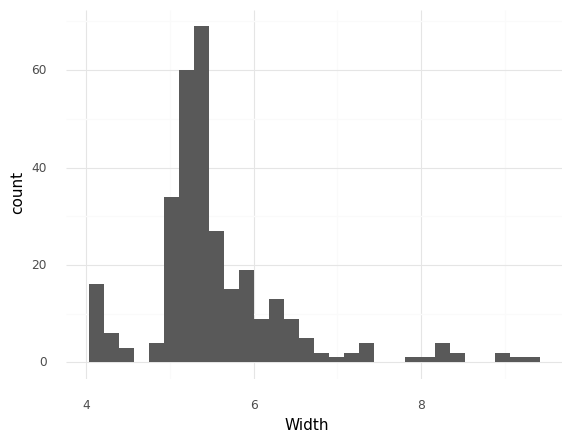

<ggplot: (8759728961759)>

In [34]:
(ggplot(df, aes(x = "Width")) + geom_histogram() + theme_minimal())

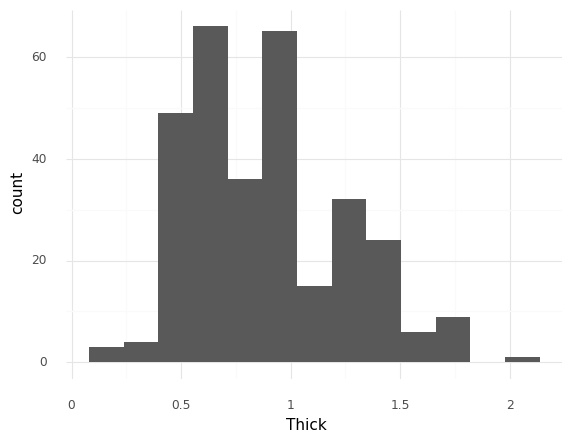

<ggplot: (8759728951080)>

In [35]:
(ggplot(df, aes(x = "Thick")) + geom_histogram() + theme_minimal())

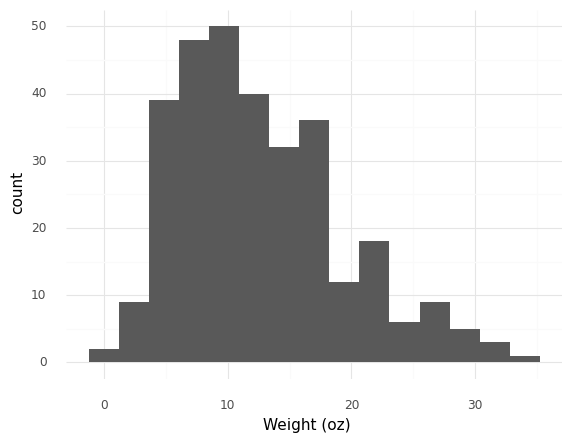

<ggplot: (8759729298405)>

In [36]:
(ggplot(df, aes(x = "Weight (oz)")) + geom_histogram() + theme_minimal())

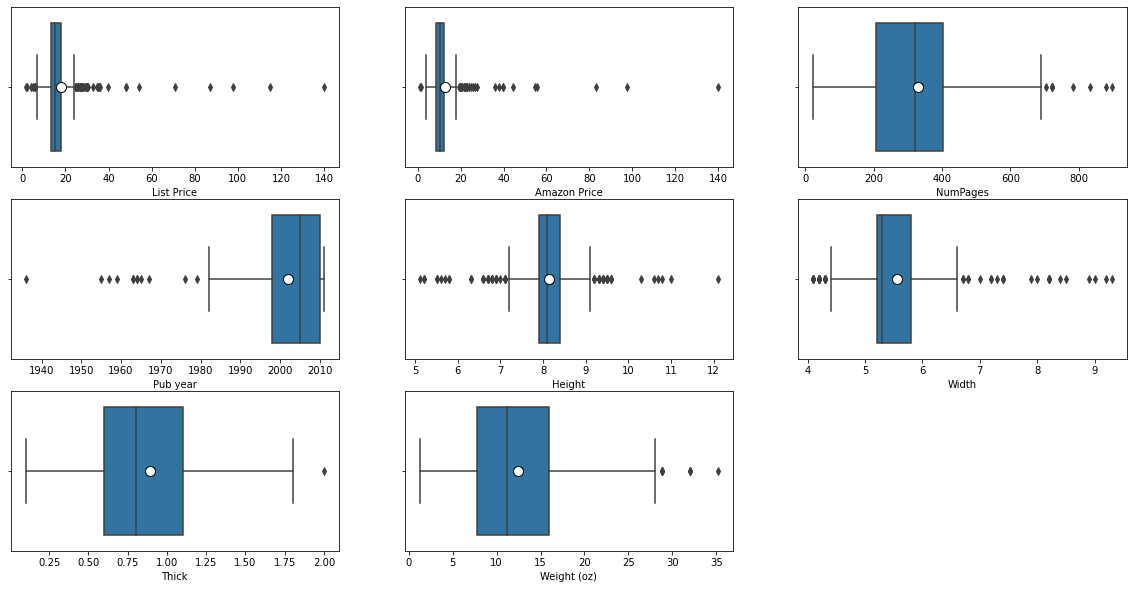

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

index = 0
plt.figure(figsize=(20, 10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(3, 3, index)
    sns.boxplot(x=feature, 
                data=df, 
                whis=1.5,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})

**Model**

In [39]:
# set up X and y
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

X = df[predictors]
y = df["Amazon Price"]

In [40]:
# z score
z = StandardScaler()

z.fit(X)

Xz = z.transform(X)

In [41]:
# create model

LR_Model = LinearRegression()

In [42]:
# fit model
LR_Model.fit(Xz, y)

LinearRegression()

**Model Evaluation**

In [43]:
# predict
price_pred = LR_Model.predict(Xz)
price_pred[1:10]

array([10.91587503,  0.64596322,  7.87491152, 21.75388566, 18.09350432,
       13.26001981, 10.59729274, 21.43797602,  9.48174291])

In [44]:
# mse and mae
print(mean_squared_error(y,price_pred ))
print(mean_absolute_error(y,price_pred ))

10.61233860175146
2.160439748755669


In [45]:
# r2
print(r2_score(y,price_pred ))

0.9205886088486431


**Assumption Checks**

* a note about normality.

https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

In [46]:
# make residual plot
assump = pd.DataFrame({"error": y - price_pred,
                      "predicted": price_pred})

In [48]:
assump

,error,predicted
0,-3.506917,8.686917
1,-0.715875,10.915875
2,0.854037,0.645963
3,2.995088,7.874912
4,-4.983886,21.753886
...,...,...
320,0.745593,11.494407
321,6.282997,21.267003
322,-4.022194,9.202194
323,17.540841,79.959159


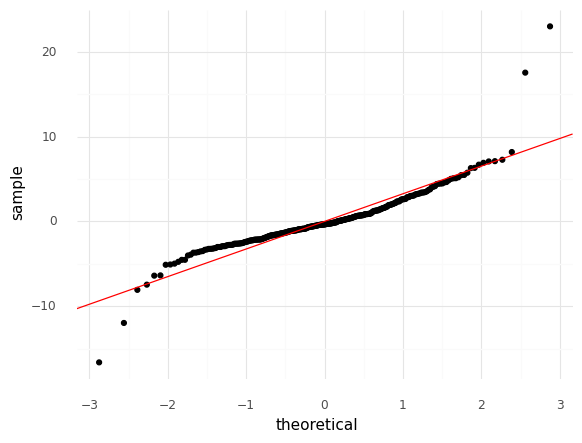

<ggplot: (8759731770353)>

In [47]:
(ggplot(assump, aes(sample = "error")) + 
stat_qq() + theme_minimal() + geom_abline(intercept = 0, slope = np.std(assump["error"]), color = "red"))

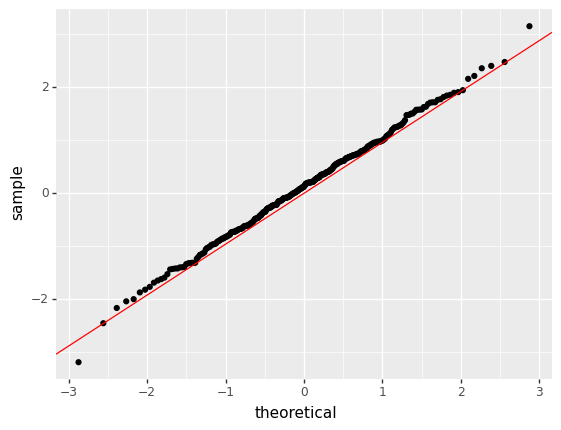

<ggplot: (8759731764740)>

In [49]:
# let's create ggplot for 2 normally distributed data to compare with our model above and see the differences 
# of the deviation of residuals

assump["random1"] = np.random.normal(0,1,len(y))
(ggplot(assump, aes(sample = "random1")) + stat_qq() + 
 geom_abline(intercept = 0, slope = np.std(assump["random1"]), color = "red"))

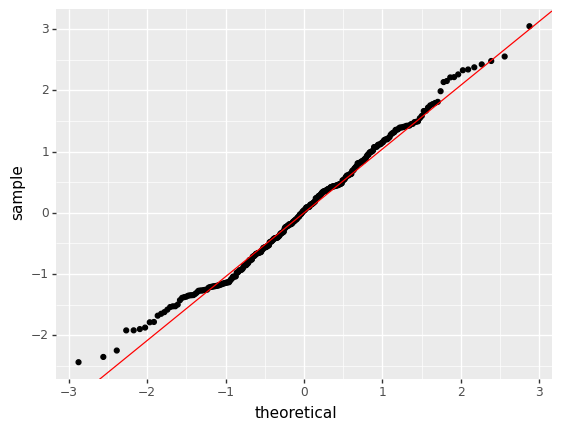

<ggplot: (8759732325331)>

In [50]:
# second
assump["random2"] = np.random.normal(0,1,len(y))
(ggplot(assump, aes(sample = "random2")) + stat_qq() + 
 geom_abline(intercept = 0, slope = np.std(assump["random2"]), color = "red"))

**Homoskedasticity and Omnibus Linearity**

Homo means the same. So what we are talking about is that the errors are approximately distributed the same way across the model

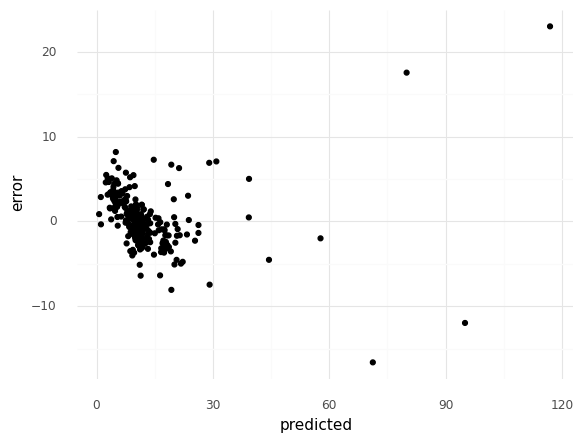

<ggplot: (8759732320410)>

In [51]:
(ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_minimal())
# what are we looking for? Heteroskedasticity and linearity
# as it can be seen below, we don't have homoskedasticty but rather, hetereskedasticity, which means that the distribution
# of errors does not follow the same pattern. We have extreme dispersions in the upper end.

# we normally should change the model bec of this heteroskedasticity, but for practice we'll keep using this model.

**Linearity**

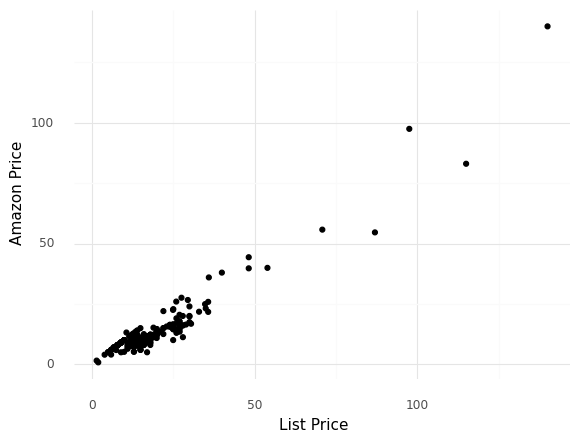

<ggplot: (8759732515286)>

In [53]:
# check linearity to see if there are any non-linear patterns
(ggplot(df, aes(x = "List Price", y = "Amazon Price")) + geom_point() + theme_minimal())

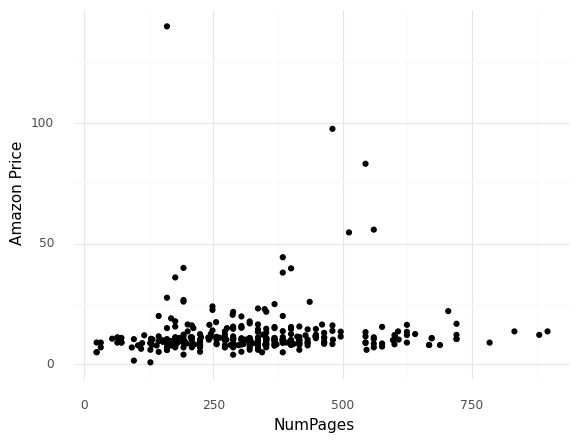

<ggplot: (8759732333731)>

In [54]:
# there are outliers
(ggplot(df, aes(x = "NumPages", y = "Amazon Price")) + geom_point() + theme_minimal())

**Examples of various Homoskedasticity, Heteroskedasticity and Linearity**

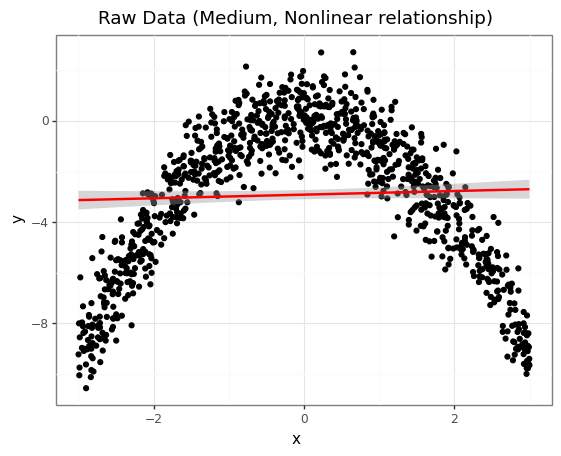

<ggplot: (8759732836093)>

In [55]:
# medium relationship but NONlinear
x = np.random.uniform(low = -3, high = 3, size = 1000)
y = -1*x**2 + np.random.normal(loc = 0, scale = 1, size = 1000)

df1 = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df1, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") +
labs(title = "Raw Data (Medium, Nonlinear relationship)"))


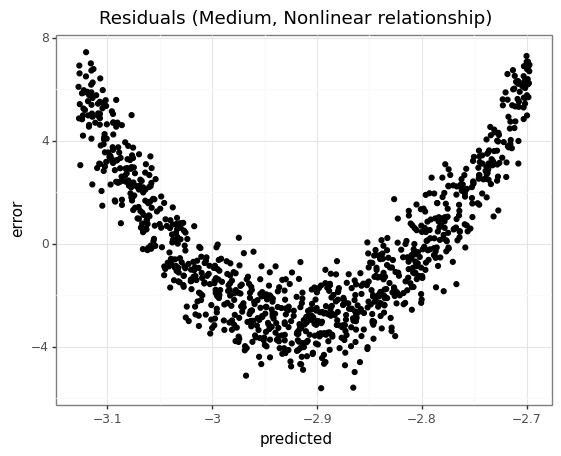

<ggplot: (8759733459092)>

In [60]:
# what do you think the residuals will look like?

# create model
LR = LinearRegression()

# separate predictors and outcome
X = np.array(df1['x']).reshape(-1, 1) #we have to do this because there's only 1 predictor
y = df1['y']

# fit model
LR.fit(X,y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assump = pd.DataFrame({"error": predicted - y, "predicted": predicted})

ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_bw() + labs(title = "Residuals (Medium, Nonlinear relationship)")

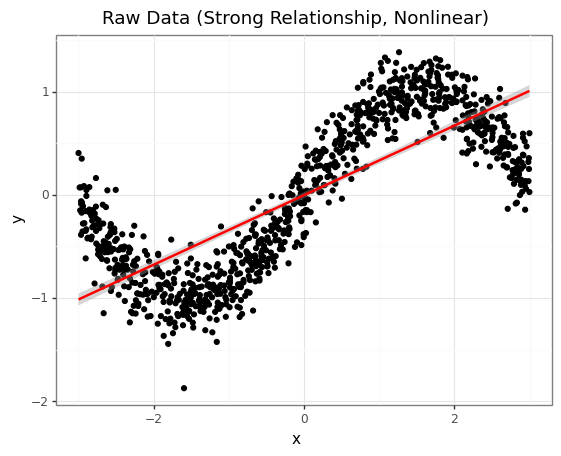

<ggplot: (8759733357017)>

In [61]:
# strong relationship but NONlinear
x = np.random.uniform(low = -3, high = 3, size = 1000)
y = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 1000)

df2 = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df2, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") +
labs(title = "Raw Data (Strong Relationship, Nonlinear)"))

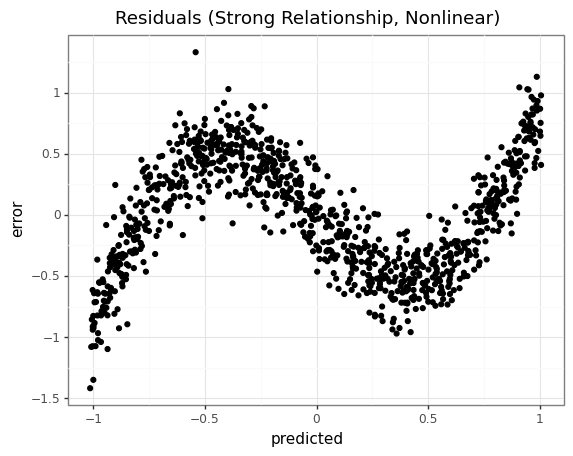

<ggplot: (8759736085896)>

In [63]:
# create model
LR = LinearRegression()

# separate predictors and outcome
X = np.array(df2['x']).reshape(-1, 1) #we have to do this because there's only 1 predictor
y = df2['y']

# fit model
LR.fit(X,y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assump = pd.DataFrame({"error": predicted - y, "predicted": predicted})

ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_bw() + labs(title = "Residuals (Strong Relationship, Nonlinear)")


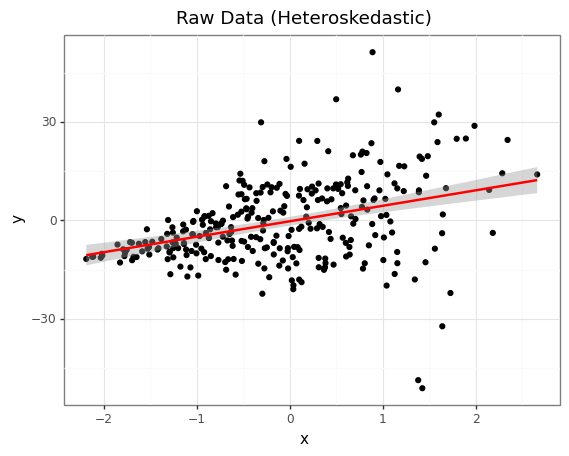

<ggplot: (8759736084628)>

In [64]:
# Linear, Heteroskedastic Data
x = np.random.normal(loc = 0, scale = 1, size = 300)
y = x*5.4 + (np.random.normal(loc = 0, scale = 0.1+ 5*(x - min(x))))

df3 = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df3, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") +
labs(title = "Raw Data (Heteroskedastic)"))

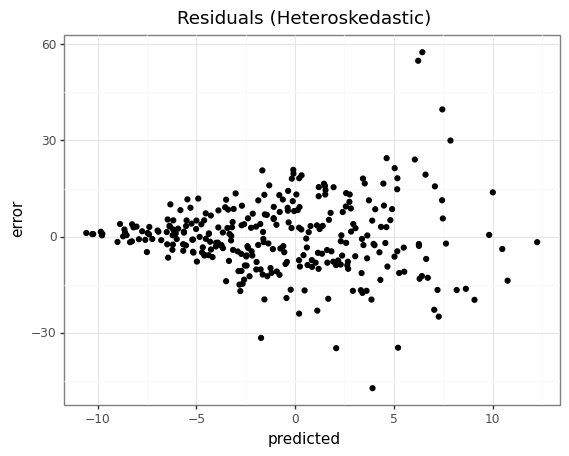

<ggplot: (8759729133306)>

In [65]:
# create model
LR = LinearRegression()

# separate predictors and outcome
X = np.array(df3['x']).reshape(-1, 1) #we have to do this because there's only 1 predictor
y = df3['y']

# fit model
LR.fit(X,y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assump = pd.DataFrame({"error": predicted - y, "predicted": predicted})

ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_bw() + labs(title = "Residuals (Heteroskedastic)")

**Pull Coefficients**

In [66]:
# coef df
coefficients = pd.DataFrame({"Coef": LR_Model.coef_,
                            "Name": predictors})
coefficients = coefficients.append({"Coef": LR_Model.intercept_,
                                   "Name": "intercept"}, ignore_index = True)
coefficients

# for ex: list price: one std increase in list price associate with 11.4 dollar increase of predicted amazon price

# coeff is ehat the model uses to predict the value.

,Coef,Name
0,11.401887,List Price
1,0.231519,NumPages
2,-0.419686,Weight (oz)
3,-1.159632,Thick
4,-0.098886,Height
5,-0.197179,Width
6,12.587645,intercept


**Predict**

In [67]:
# degerleri su sekilde olan yeni bir kitaba modelimiz ne fiyat bicer:
newBook = np.array([12.45,300,10,.8,8,5]).reshape(1,-1)

newBookz = z.transform(newBook)

LR_Model.predict(newBookz)
# 8.42 dollar

array([8.42151431])

In [68]:
# manual check:

newBook_inter = np.append(newBookz,1)
newBook_inter

array([-0.41343253, -0.19260029, -0.36718493, -0.25354952, -0.15097461,
       -0.65582302,  1.        ])

In [70]:
np.sum(np.array(coefficients["Coef"])*newBook_inter)

8.421514307944573